In [1]:
import yfinance as yf
import pandas as pd
from pandas_datareader import data as pdr

In [23]:
asxTicker = 'AX1.AX'

data = yf.download(
        tickers = asxTicker,
        period = "1d",
        interval="15m")

[*********************100%***********************]  1 of 1 completed


In [36]:
dataFrame = pd.DataFrame({"Open":data['Open'], "Close": data['Close']}).reset_index()

dataFrame

,Datetime,Open,Close
0,2023-02-08 10:00:00+11:00,2.250,2.200
1,2023-02-08 10:15:00+11:00,2.195,2.210
2,2023-02-08 10:30:00+11:00,2.200,2.185
3,2023-02-08 10:45:00+11:00,2.180,2.170
4,2023-02-08 11:00:00+11:00,2.160,2.160
5,2023-02-08 11:15:00+11:00,2.155,2.160
6,2023-02-08 11:30:00+11:00,2.150,2.150
7,2023-02-08 11:45:00+11:00,2.145,2.150
8,2023-02-08 12:00:00+11:00,2.150,2.130
9,2023-02-08 12:15:00+11:00,2.130,2.130


<AxesSubplot:xlabel='Datetime'>

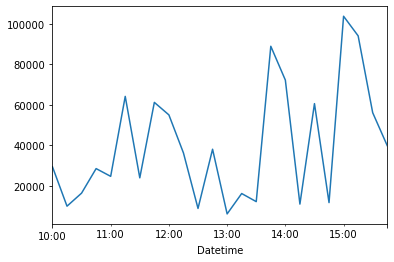

In [24]:
data['Volume'].plot()

<AxesSubplot:xlabel='Datetime'>

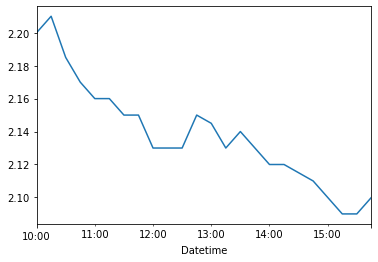

In [25]:
data['Close'].plot()